In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DataTransformation import LowPassFilter, PrincipalComponentAnalysis
from TemporalAbstraction import NumericalAbstraction
from FrequencyAbstraction import FourierTransformation

In [2]:
df = pd.read_pickle("../../data/interim/removed_outliers_chauvenet_02.pkl")

In [3]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,bench,heavy,B,64
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,bench,heavy,B,64
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,bench,heavy,B,64
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,bench,heavy,B,64
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,bench,heavy,B,64
...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,row,medium,E,71
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,row,medium,E,71
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,row,medium,E,71


In [4]:
predictor_columns = list(df.columns[:6])

In [5]:
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

In [6]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9005 non-null   float64
 1   acc_y        8998 non-null   float64
 2   acc_z        8999 non-null   float64
 3   gyr_x        8984 non-null   float64
 4   gyr_y        8938 non-null   float64
 5   gyr_z        8945 non-null   float64
 6   label        9009 non-null   object 
 7   category     9009 non-null   object 
 8   participant  9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


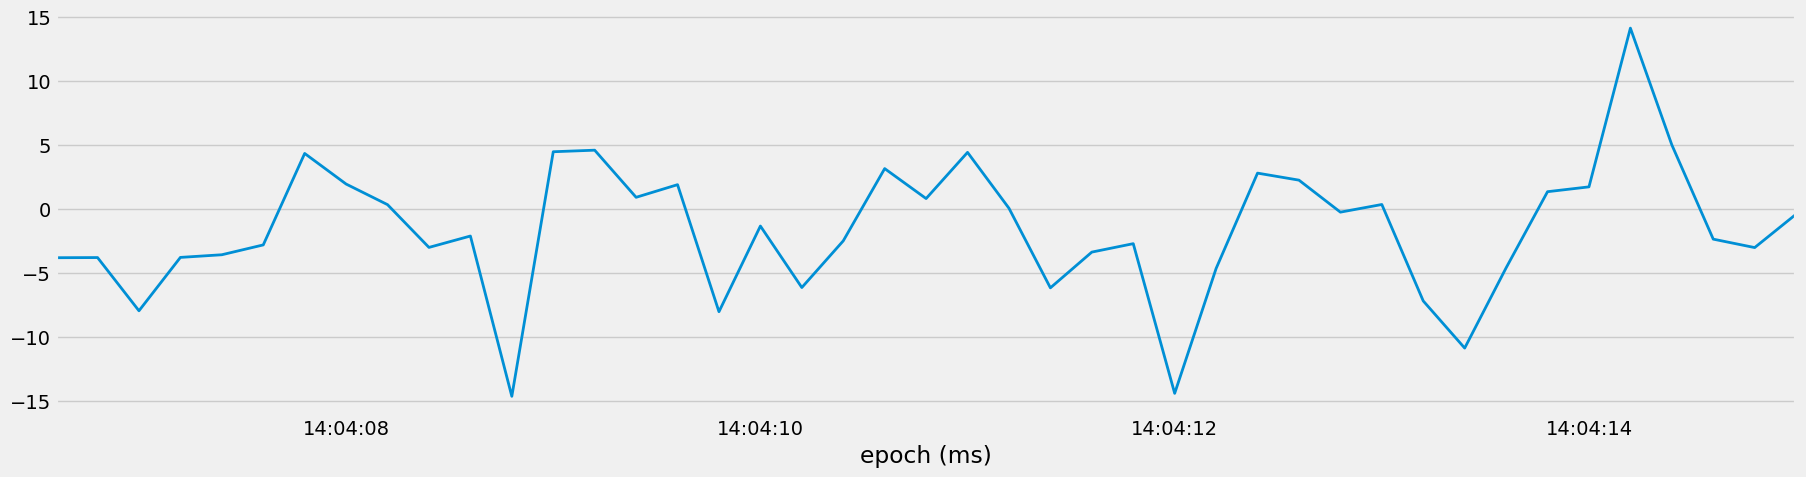

In [8]:
subset = df[df["set"] == 35]["gyr_y"].plot()

In [9]:
for col in predictor_columns:
    df[col] = df[col].interpolate()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x        9009 non-null   float64
 1   acc_y        9009 non-null   float64
 2   acc_z        9009 non-null   float64
 3   gyr_x        9009 non-null   float64
 4   gyr_y        9009 non-null   float64
 5   gyr_z        9009 non-null   float64
 6   label        9009 non-null   object 
 7   category     9009 non-null   object 
 8   participant  9009 non-null   object 
 9   set          9009 non-null   int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 774.2+ KB


<Axes: xlabel='epoch (ms)'>

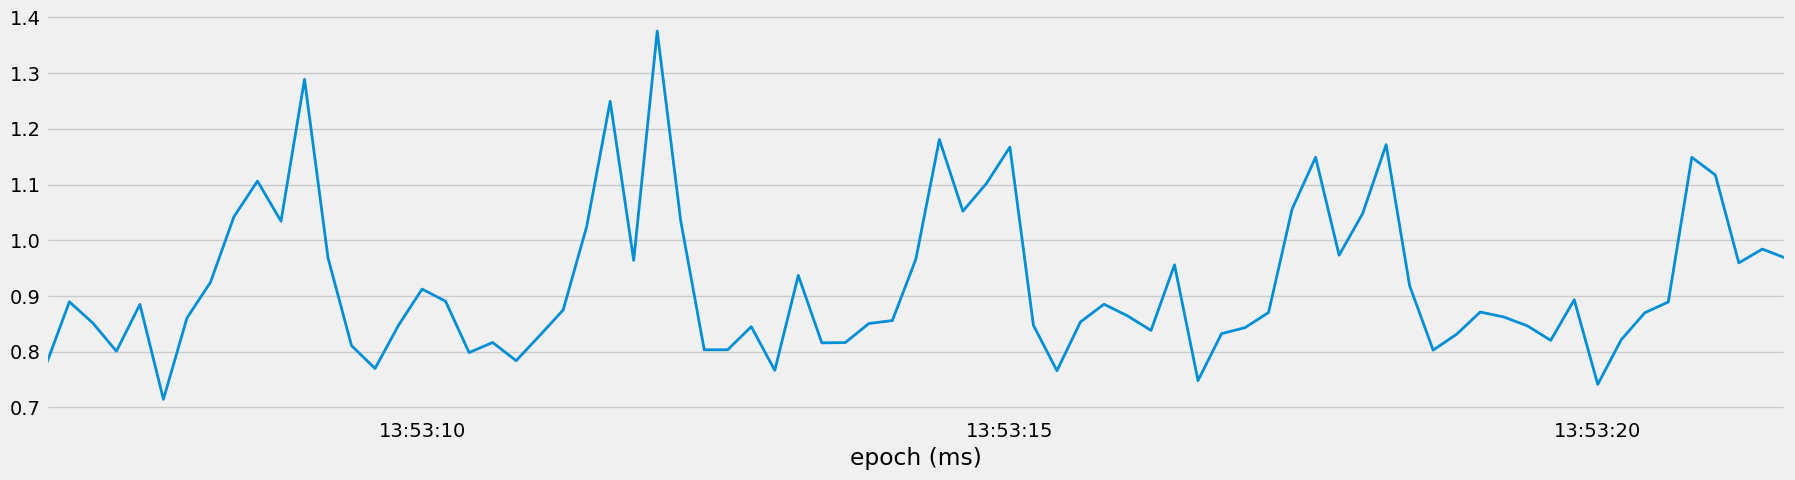

In [11]:
df[df["set"] == 25]["acc_y"].plot()

<Axes: xlabel='epoch (ms)'>

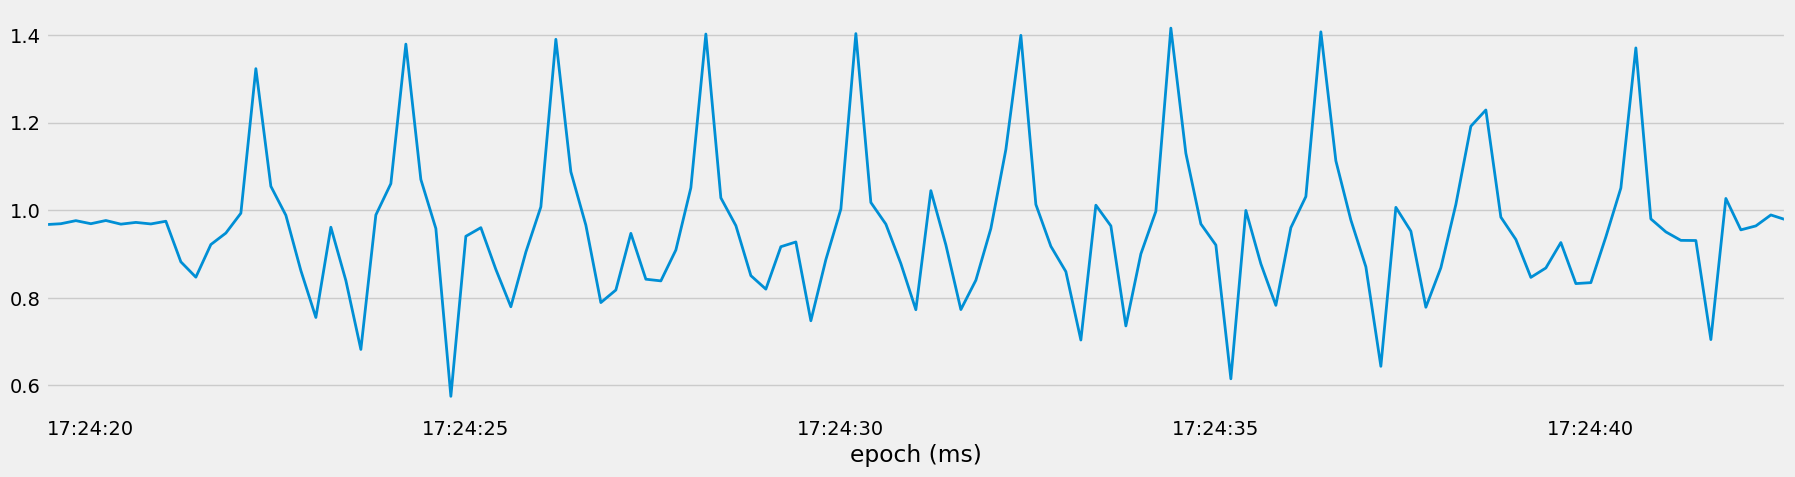

In [12]:
df[df["set"] == 47]["acc_y"].plot()

In [13]:
duration = df[df["set"] == 1].index[-1] - df[df["set"] == 1].index[0]

In [14]:
duration.seconds

20

In [15]:
for s in df["set"].unique():
    first = df[df["set"] == s].index[0]
    last = df[df["set"] == s].index[-1]
    duration = last - first
    df.loc[(df["set"] == s), "duration"] = duration.seconds

In [16]:
df_duration = df.groupby(["category"])["duration"].mean()

In [17]:
df_duration.iloc[0] / 5   # duration of 1 medium rep

np.float64(2.9487001733102254)

In [18]:
df_duration.iloc[1] / 10  # duration of 1 heavy rep

np.float64(2.4942528735632186)

In [19]:
df_lowpass = df.copy()

In [20]:
df_lowpass

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,bench,heavy,B,64,16.0
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,bench,heavy,B,64,16.0
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,bench,heavy,B,64,16.0
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,bench,heavy,B,64,16.0
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,bench,heavy,B,64,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.048000,-1.041500,-0.076500,1.4146,-5.6218,0.2926,row,medium,E,71,19.0
2019-01-20 17:33:27.200,-0.037000,-1.030333,-0.053333,-2.7684,-0.5854,2.2440,row,medium,E,71,19.0
2019-01-20 17:33:27.400,-0.060000,-1.031000,-0.082000,2.8416,-5.1342,-0.1220,row,medium,E,71,19.0


In [21]:
lowpass = LowPassFilter()

In [22]:
fs = 1000 / 200 # 5 instances per second
cutoff = 1.3

In [23]:
df_lowpass = lowpass.low_pass_filter(df_lowpass, "acc_y", fs, cutoff, order = 5)

In [24]:
subset = df_lowpass[df_lowpass["set"] == 28]

In [25]:
print(subset["label"][0])

dead


<ipython-input-25-823db250493d>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(subset["label"][0])


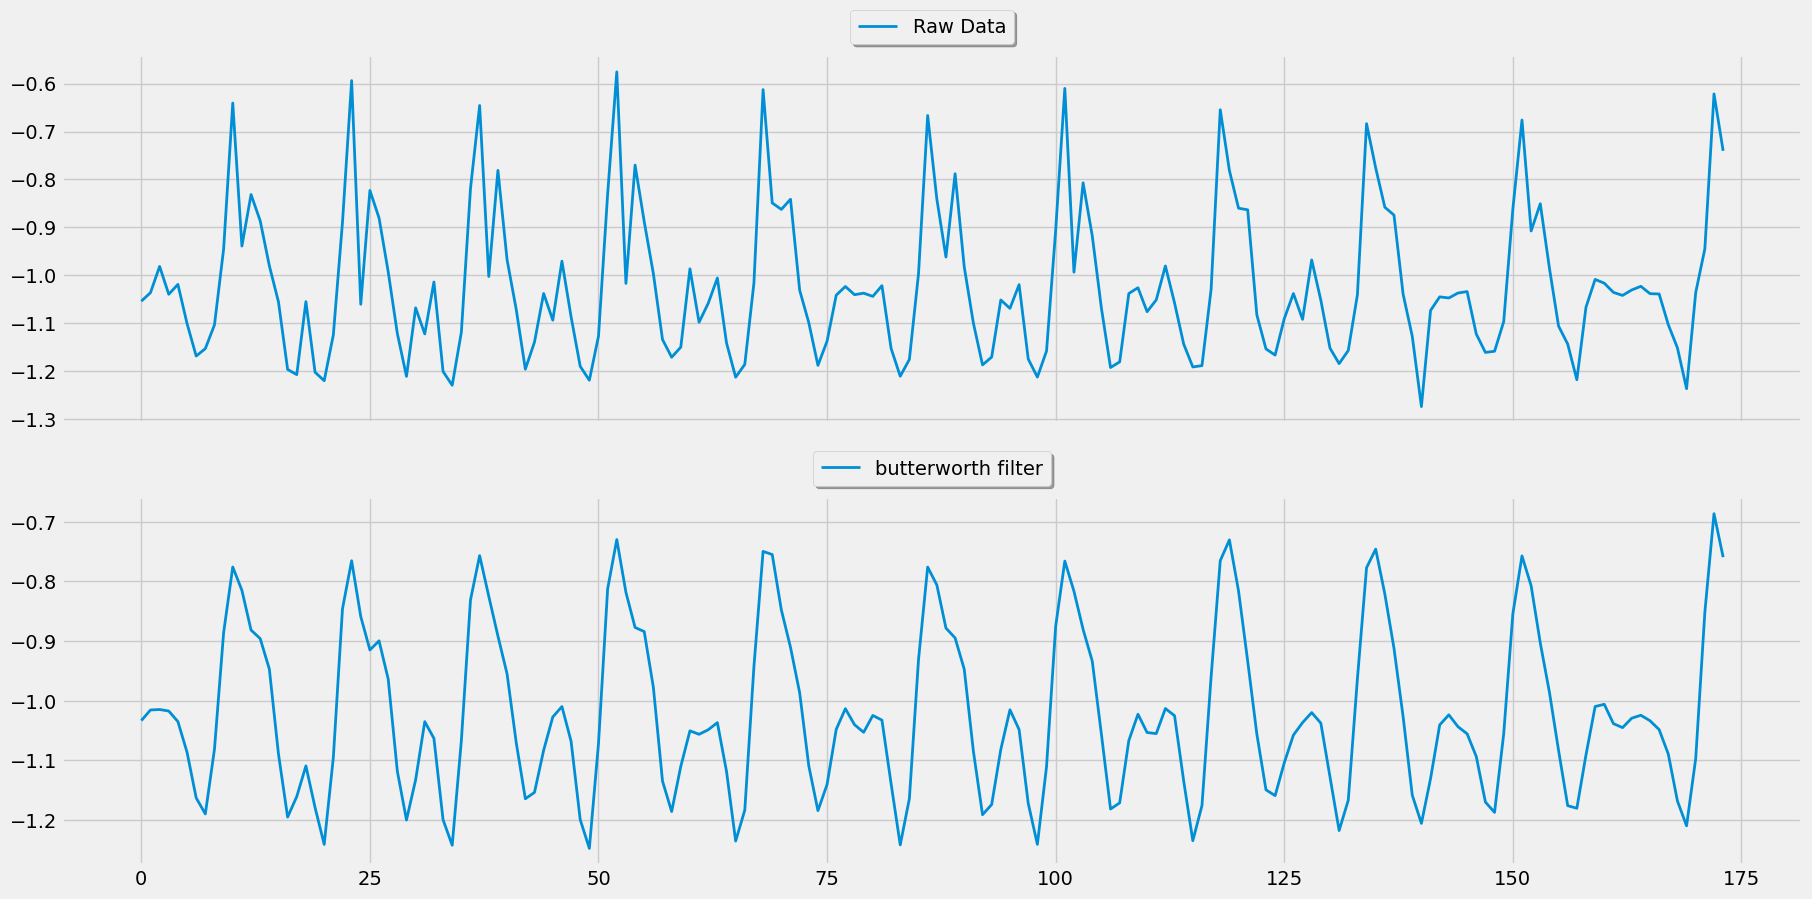

In [26]:
fix, ax = plt.subplots(nrows = 2, sharex=True, figsize = (20, 10))
ax[0].plot(subset["acc_y"].reset_index(drop = True), label = "Raw Data")
ax[1].plot(subset["acc_y_lowpass"].reset_index(drop = True), label = "butterworth filter")
ax[0].legend(loc = "upper center", bbox_to_anchor = (0.5, 1.15), fancybox = True, shadow = True)
ax[1].legend(loc = "upper center", bbox_to_anchor = (0.5, 1.15), fancybox = True, shadow = True)

In [27]:
for col in predictor_columns:
    df_lowpass = lowpass.low_pass_filter(df_lowpass, col, fs, cutoff, order=5)
    # overwrite the original column
    df_lowpass[col] = df_lowpass[col + "_lowpass"]
    del df_lowpass[col + "_lowpass"]

In [28]:
df_pca = df_lowpass.copy()

In [29]:
df_pca

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,duration
epoch (ms),,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,bench,heavy,B,64,16.0
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,bench,heavy,B,64,16.0
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,bench,heavy,B,64,16.0
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,bench,heavy,B,64,16.0
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,bench,heavy,B,64,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,19.0
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,71,19.0
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,71,19.0


In [30]:
pca = PrincipalComponentAnalysis()

In [31]:
pc_values = pca.determine_pc_explained_variance(df_pca, predictor_columns)

In [32]:
pc_values

array([0.57992901, 0.27309479, 0.06509761, 0.05306529, 0.01866432,
       0.01014897])

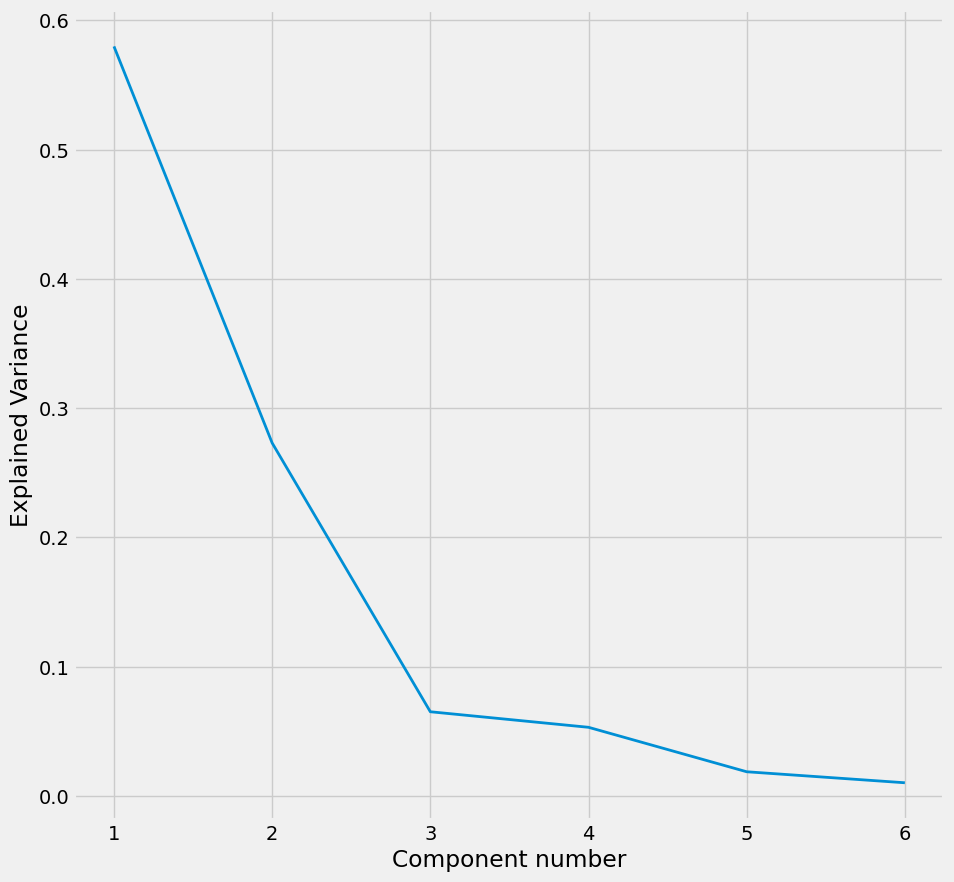

In [33]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(predictor_columns) + 1), pc_values)
plt.xlabel("Component number")
plt.ylabel("Explained Variance")
plt.show()

In [34]:
df_pca = pca.apply_pca(df_pca, predictor_columns, 3)

In [35]:
subset = df_pca[df_pca["set"] == 28]

<Axes: xlabel='epoch (ms)'>

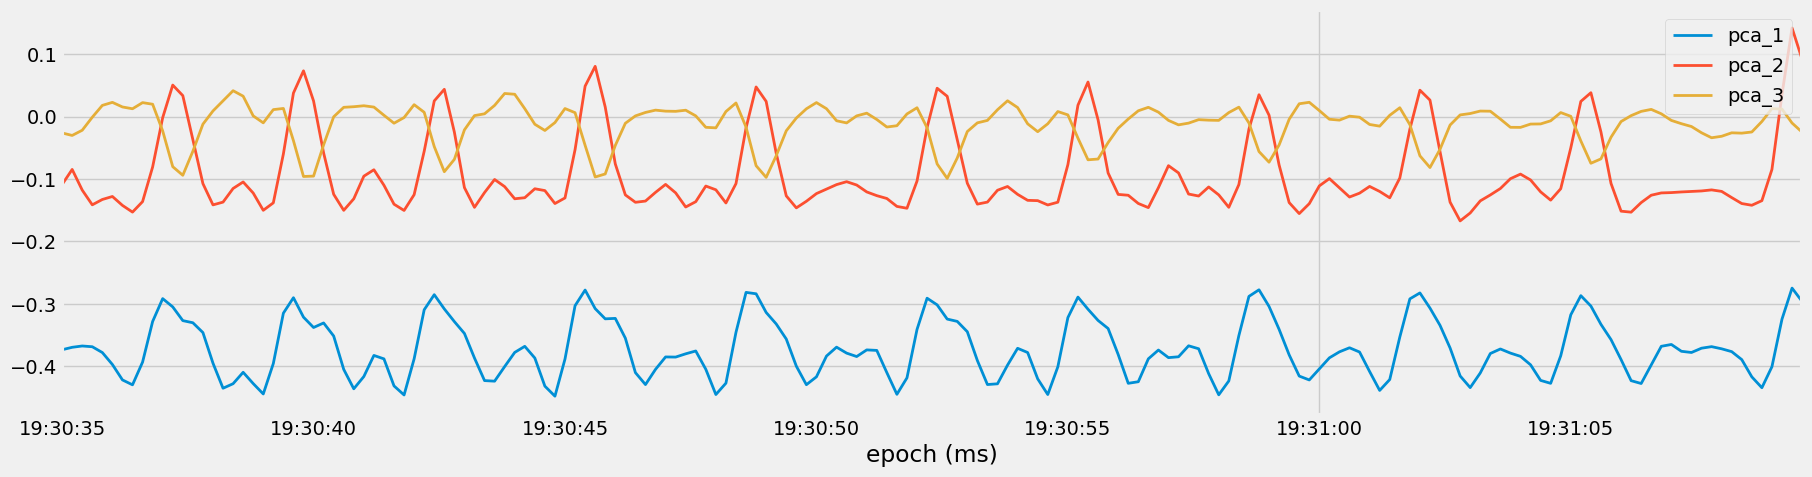

In [36]:
subset[["pca_1", "pca_2", "pca_3"]].plot()

In [37]:
df_pca

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,bench,heavy,B,64,16.0,0.315889,-0.075461,0.072243
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,bench,heavy,B,64,16.0,0.314873,-0.073888,0.069825
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,bench,heavy,B,64,16.0,0.314236,-0.080343,0.066219
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,bench,heavy,B,64,16.0,0.314356,-0.090852,0.061839
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,bench,heavy,B,64,16.0,0.313630,-0.097479,0.062974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,19.0,-0.349351,-0.148450,-0.053031
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,71,19.0,-0.371610,-0.151455,-0.058498
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,71,19.0,-0.368098,-0.153153,-0.058772


In [38]:
df_squared = df_pca.copy()

In [39]:
df_squared

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,duration,pca_1,pca_2,pca_3
epoch (ms),,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,bench,heavy,B,64,16.0,0.315889,-0.075461,0.072243
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,bench,heavy,B,64,16.0,0.314873,-0.073888,0.069825
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,bench,heavy,B,64,16.0,0.314236,-0.080343,0.066219
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,bench,heavy,B,64,16.0,0.314356,-0.090852,0.061839
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,bench,heavy,B,64,16.0,0.313630,-0.097479,0.062974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,19.0,-0.349351,-0.148450,-0.053031
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,71,19.0,-0.371610,-0.151455,-0.058498
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,71,19.0,-0.368098,-0.153153,-0.058772


In [40]:
acc_r = df_squared["acc_x"] ** 2 + df_squared["acc_y"] ** 2 + df_squared["acc_z"] ** 2

In [41]:
gyr_r = df_squared["gyr_x"] ** 2 + df_squared["gyr_y"] ** 2 + df_squared["gyr_z"] ** 2

In [42]:
df_squared["acc_r"] = np.sqrt(acc_r)
df_squared["gyr_r"] = np.sqrt(gyr_r)

In [43]:
subset = df_squared[df_squared["set"] == 28]

array([<Axes: xlabel='epoch (ms)'>, <Axes: xlabel='epoch (ms)'>],
      dtype=object)

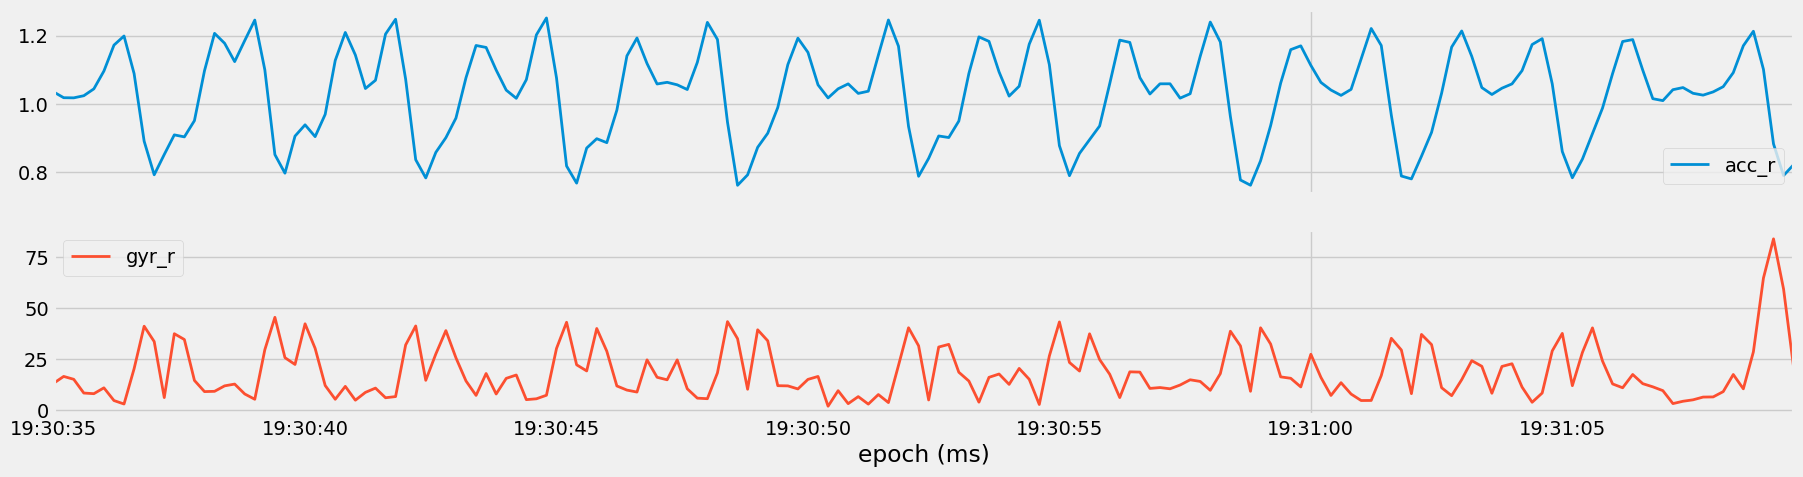

In [44]:
subset[["acc_r", "gyr_r"]].plot(subplots = True)

In [45]:
df_squared

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,bench,heavy,B,64,16.0,0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,bench,heavy,B,64,16.0,0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,bench,heavy,B,64,16.0,0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,bench,heavy,B,64,16.0,0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,bench,heavy,B,64,16.0,0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,19.0,-0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,71,19.0,-0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,71,19.0,-0.368098,-0.153153,-0.058772,1.047919,2.329568


In [46]:
df_temporal = df_squared.copy()

In [47]:
df_temporal

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,duration,pca_1,pca_2,pca_3,acc_r,gyr_r
epoch (ms),,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,bench,heavy,B,64,16.0,0.315889,-0.075461,0.072243,0.979672,3.222503
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,bench,heavy,B,64,16.0,0.314873,-0.073888,0.069825,0.975474,0.600176
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,bench,heavy,B,64,16.0,0.314236,-0.080343,0.066219,0.969585,4.948974
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,bench,heavy,B,64,16.0,0.314356,-0.090852,0.061839,0.966278,5.903203
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,bench,heavy,B,64,16.0,0.313630,-0.097479,0.062974,0.964693,2.293593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,19.0,-0.349351,-0.148450,-0.053031,0.991076,4.508719
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,71,19.0,-0.371610,-0.151455,-0.058498,1.056234,4.289212
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,71,19.0,-0.368098,-0.153153,-0.058772,1.047919,2.329568


In [48]:
numabs = NumericalAbstraction()

In [49]:
predictor_columns = predictor_columns + ["acc_r", "gyr_r"]

In [50]:
predictor_columns

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'acc_r', 'gyr_r']

In [51]:
ws = int(1000 / 200)

In [52]:
for col in predictor_columns:
    df_temporal = numabs.abstract_numerical(df_temporal, [col], ws, "mean")
    df_temporal = numabs.abstract_numerical(df_temporal, [col], ws, "std")

In [53]:
df_temporal

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,...,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,bench,heavy,B,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,bench,heavy,B,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,bench,heavy,B,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,bench,heavy,B,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,bench,heavy,B,64,...,1.522572,2.602489,-0.771259,2.043684,-0.512552,0.971453,0.971141,0.005643,3.393690,1.884665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,...,-11.989659,18.259425,0.708827,5.430793,7.123556,6.254808,1.084478,0.121141,19.075515,15.269147
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,71,...,-4.824823,12.436925,-1.585429,3.656665,4.440976,5.065650,1.103662,0.106692,11.430679,10.419379
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,71,...,0.842782,4.018501,-3.071749,1.189271,1.950523,2.192982,1.061156,0.072672,5.509310,2.443328


In [54]:
df_temporal_list = []

In [55]:
for s in df_temporal["set"].unique():
    subset = df_temporal[df_temporal["set"] == s].copy()
    for col in predictor_columns:
        subset = numabs.abstract_numerical(subset, [col], ws, "mean")
        subset = numabs.abstract_numerical(subset, [col], ws, "std")
    df_temporal_list.append(subset)

In [56]:
df_temporal = pd.concat(df_temporal_list)

In [57]:
df_temporal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9009 entries, 2019-01-11 15:08:05.200000 to 2019-01-20 17:33:27.800000
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_x                 9009 non-null   float64
 1   acc_y                 9009 non-null   float64
 2   acc_z                 9009 non-null   float64
 3   gyr_x                 9009 non-null   float64
 4   gyr_y                 9009 non-null   float64
 5   gyr_z                 9009 non-null   float64
 6   label                 9009 non-null   object 
 7   category              9009 non-null   object 
 8   participant           9009 non-null   object 
 9   set                   9009 non-null   int64  
 10  duration              9009 non-null   float64
 11  pca_1                 9009 non-null   float64
 12  pca_2                 9009 non-null   float64
 13  pca_3                 9009 non-null   float64
 14  acc_r                 

<Axes: xlabel='epoch (ms)'>

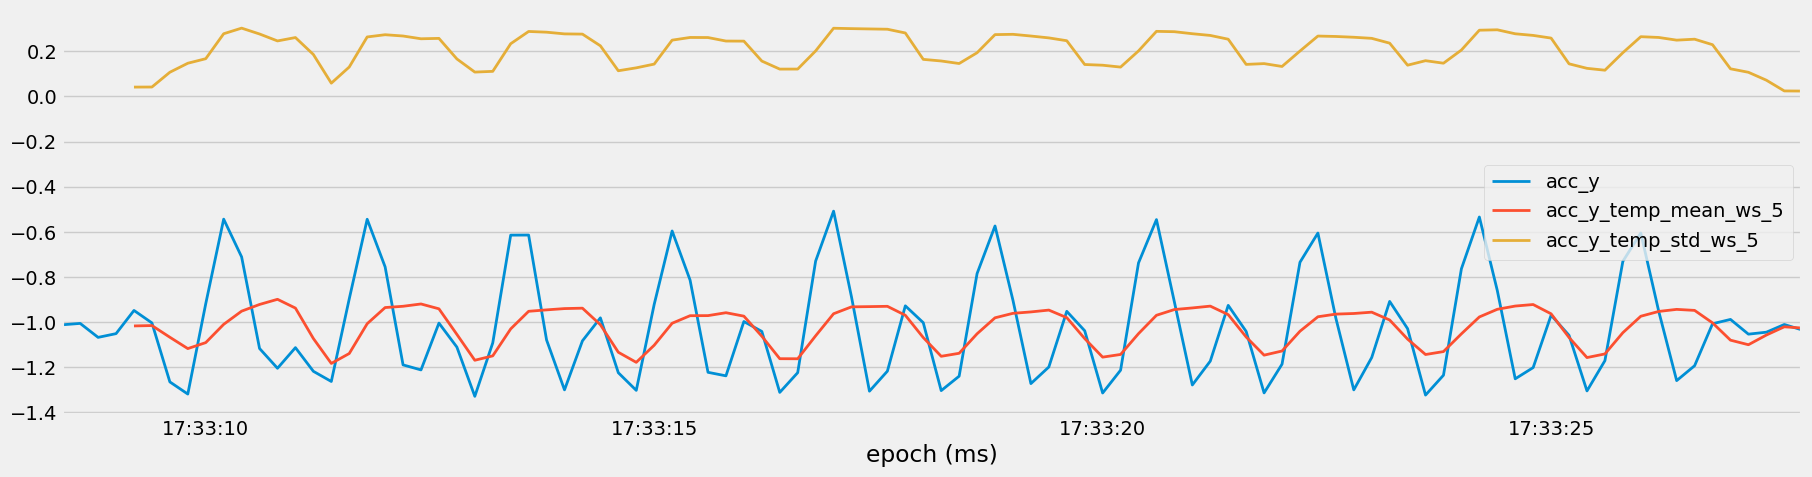

In [58]:
subset[["acc_y", "acc_y_temp_mean_ws_5", "acc_y_temp_std_ws_5"]].plot()

<Axes: xlabel='epoch (ms)'>

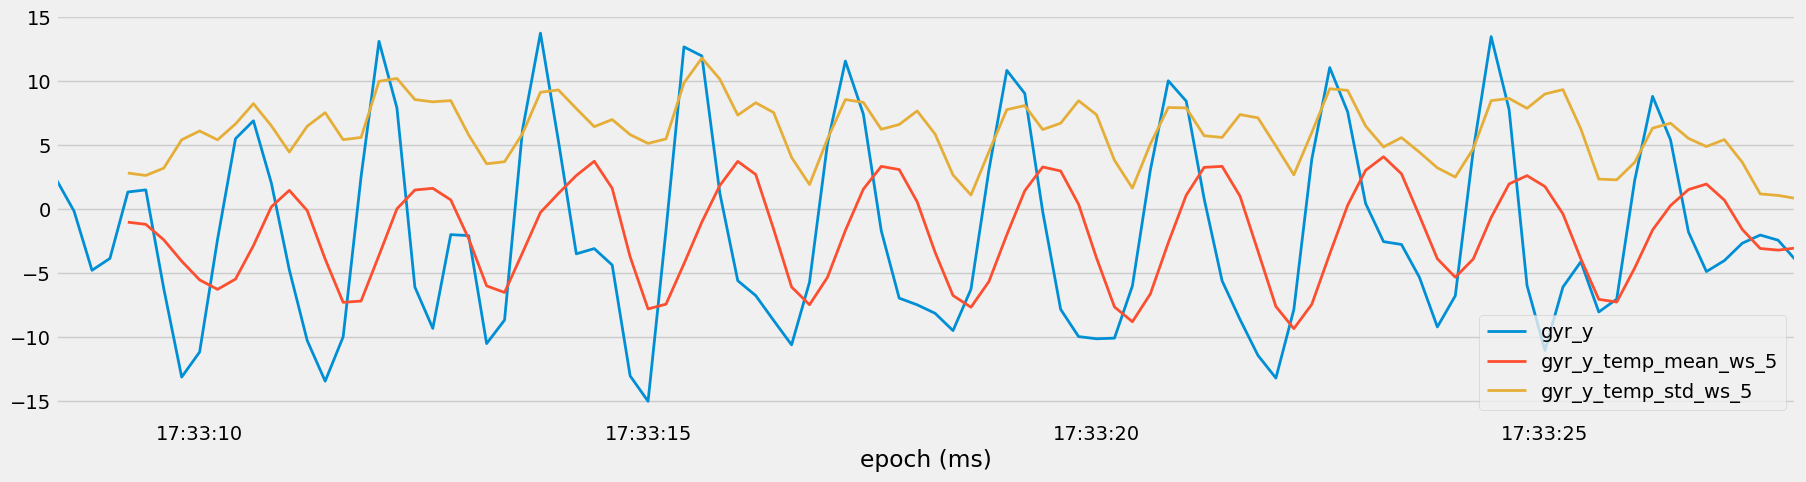

In [59]:
subset[["gyr_y", "gyr_y_temp_mean_ws_5", "gyr_y_temp_std_ws_5"]].plot()

In [60]:
df_freq = df_temporal.copy().reset_index()

In [61]:
df_freq

,epoch (ms),acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,...,gyr_x_temp_mean_ws_5,gyr_x_temp_std_ws_5,gyr_y_temp_mean_ws_5,gyr_y_temp_std_ws_5,gyr_z_temp_mean_ws_5,gyr_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyr_r_temp_mean_ws_5,gyr_r_temp_std_ws_5
0,2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,bench,heavy,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,bench,heavy,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,bench,heavy,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,bench,heavy,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,bench,heavy,B,...,1.522572,2.602489,-0.771259,2.043684,-0.512552,0.971453,0.971141,0.005643,3.393690,1.884665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,...,-11.989659,18.259425,0.708827,5.430793,7.123556,6.254808,1.084478,0.121141,19.075515,15.269147
9005,2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,...,-4.824823,12.436925,-1.585429,3.656665,4.440976,5.065650,1.103662,0.106692,11.430679,10.419379
9006,2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,...,0.842782,4.018501,-3.071749,1.189271,1.950523,2.192982,1.061156,0.072672,5.509310,2.443328
9007,2019-01-20 17:33:27.600,-0.050572,-1.010599,-0.060327,3.033517,-2.427441,0.279918,row,medium,E,...,2.006143,3.622861,-3.200450,1.071976,0.760034,0.532219,1.024177,0.024274,4.877383,2.369344


In [62]:
freqabs = FourierTransformation()

In [63]:
fs = int(1000 / 200)
ws = int(2800 / 200)

In [64]:
df_freq = freqabs.abstract_frequency(df_freq, ["acc_y"], ws, fs)

In [65]:
df_freq

,epoch (ms),acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,...,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_14,acc_y_freq_0.357_Hz_ws_14,acc_y_freq_0.714_Hz_ws_14,acc_y_freq_1.071_Hz_ws_14,acc_y_freq_1.429_Hz_ws_14,acc_y_freq_1.786_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,acc_y_freq_2.5_Hz_ws_14
0,2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,bench,heavy,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,bench,heavy,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,bench,heavy,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,bench,heavy,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,bench,heavy,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9004,2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,...,-0.366246,0.080086,-15.086721,0.169773,1.260702,0.908251,0.370038,0.284737,0.272604,0.270130
9005,2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,...,-0.189618,0.098206,-15.605886,-0.499724,1.034515,-1.036798,0.960714,0.363849,0.279607,0.252243
9006,2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,...,0.083718,0.054012,-15.790817,-0.732594,0.519170,-1.087010,-0.032387,-0.036956,-0.056240,-0.063536
9007,2019-01-20 17:33:27.600,-0.050572,-1.010599,-0.060327,3.033517,-2.427441,0.279918,row,medium,E,...,0.116557,0.041741,-15.550088,-0.433942,0.006282,0.624310,-0.794175,-0.262326,-0.198431,-0.178484


In [66]:
subset = df_freq[df_freq["set"] == 15]

<Axes: >

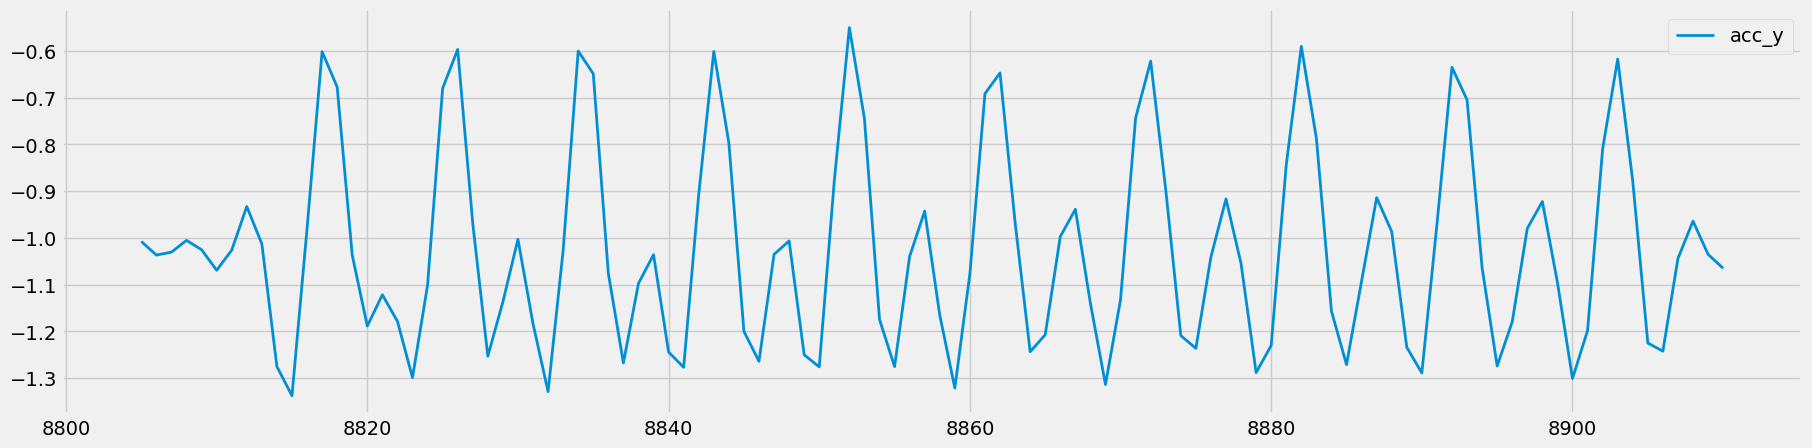

In [67]:
subset[["acc_y"]].plot()

<Axes: >

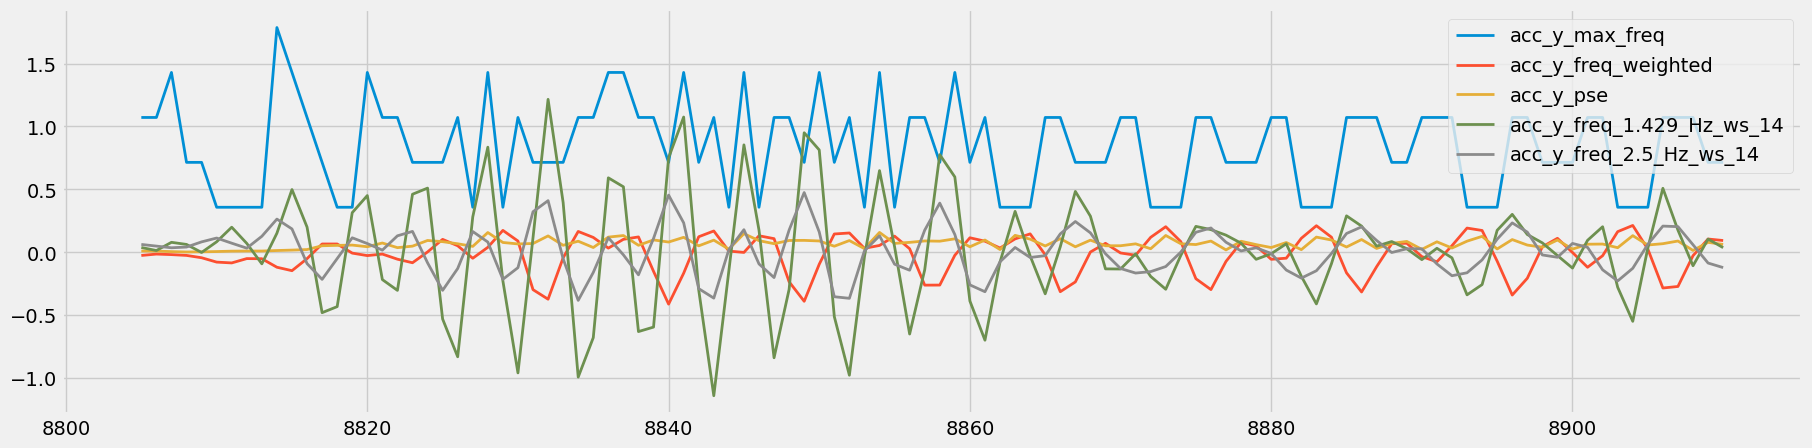

In [68]:
subset[
    [
        "acc_y_max_freq",
        "acc_y_freq_weighted",
        "acc_y_pse",
        "acc_y_freq_1.429_Hz_ws_14",
        "acc_y_freq_2.5_Hz_ws_14",
    ]
].plot()

In [69]:
df_freq_list = []

In [70]:
for s in df_freq["set"].unique():
    print(f"Applying Fourier transformations to set {s}")
    subset = df_freq[df_freq["set"] == s].reset_index(drop = True).copy()
    subset = freqabs.abstract_frequency(subset, predictor_columns, ws, fs)
    df_freq_list.append(subset)

Applying Fourier transformations to set 64
Applying Fourier transformations to set 72
Applying Fourier transformations to set 40
Applying Fourier transformations to set 86
Applying Fourier transformations to set 80
Applying Fourier transformations to set 10
Applying Fourier transformations to set 74
Applying Fourier transformations to set 52
Applying Fourier transformations to set 12
Applying Fourier transformations to set 33
Applying Fourier transformations to set 77
Applying Fourier transformations to set 53
Applying Fourier transformations to set 32
Applying Fourier transformations to set 79
Applying Fourier transformations to set 22
Applying Fourier transformations to set 17
Applying Fourier transformations to set 69
Applying Fourier transformations to set 63
Applying Fourier transformations to set 60
Applying Fourier transformations to set 92
Applying Fourier transformations to set 57
Applying Fourier transformations to set 7
Applying Fourier transformations to set 16
Applying Fou

In [71]:
df_freq = pd.concat(df_freq_list).set_index("epoch (ms)", drop = True)

In [72]:
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:05.200,0.013503,0.977003,-0.071001,-1.886218,2.438803,0.937522,bench,heavy,B,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.400,0.008515,0.973169,-0.066481,-0.367396,0.439794,0.178360,bench,heavy,B,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.600,-0.008450,0.966879,-0.071895,4.320608,-2.083978,-1.217263,bench,heavy,B,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:05.800,-0.024359,0.962244,-0.084774,4.737252,-3.456339,-0.678205,bench,heavy,B,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11 15:08:06.000,-0.022092,0.959572,-0.096776,0.808615,-1.194575,-1.783172,bench,heavy,B,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,71,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,71,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


In [73]:
df_freq = df_freq.dropna()

In [74]:
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,heavy,B,64,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.200,-0.075541,0.854894,-0.094507,-17.787623,-7.152388,16.679304,bench,heavy,B,64,...,-1.091920,0.379916,264.105051,-31.509559,-20.512654,3.718167,-36.406994,-53.036189,16.624430,-6.428409
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,heavy,B,64,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.600,-0.039468,0.947898,-0.047164,1.731909,-0.126808,-3.356740,bench,heavy,B,64,...,-0.051046,0.608396,265.472278,-54.366043,-70.788251,-14.043211,32.170170,36.805962,-27.594837,9.354092
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,heavy,B,64,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401
2019-01-20 17:33:27.200,-0.041403,-1.053448,-0.064530,-2.967835,-2.660315,1.584934,row,medium,E,71,...,0.536997,0.660463,308.391215,-44.886326,66.358365,78.568468,-20.114545,64.769560,14.905502,8.625034
2019-01-20 17:33:27.400,-0.048048,-1.044737,-0.065951,-0.043109,-2.022091,1.155930,row,medium,E,71,...,0.633179,0.577277,267.731227,-73.117861,40.866650,37.338879,18.436116,18.097675,21.450904,33.080361


In [75]:
df_freq.iloc[::2]

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,heavy,B,64,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,heavy,B,64,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,heavy,B,64,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,bench,heavy,B,64,...,0.447313,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,bench,heavy,B,64,...,-0.466787,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,medium,E,71,...,-1.344815,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,medium,E,71,...,0.463020,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401


In [76]:
df_freq = df_freq.iloc[::2]

In [77]:
df_freq

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,heavy,B,64,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,heavy,B,64,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,heavy,B,64,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,bench,heavy,B,64,...,0.447313,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,bench,heavy,B,64,...,-0.466787,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,medium,E,71,...,-1.344815,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,medium,E,71,...,0.463020,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401


In [78]:
from sklearn.cluster import k_means

In [79]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]

In [80]:
k_range = range(2, 10)

In [81]:
inertias = []

In [82]:
df_cluster = df_freq.copy()

In [83]:
df_cluster

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_freq_weighted,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,heavy,B,64,...,-1.099263,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,heavy,B,64,...,-0.182028,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,heavy,B,64,...,-0.547866,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,bench,heavy,B,64,...,0.447313,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,bench,heavy,B,64,...,-0.466787,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,medium,E,71,...,-1.344815,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,medium,E,71,...,0.463020,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,...,-0.255402,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401


In [84]:
cluster_columns = ["acc_x", "acc_y", "acc_z"]
k_values = range(2, 10)
inertias = []

In [85]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters = k, n_init = 20, random_state = 0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

NameError: name 'KMeans' is not defined

In [86]:
from sklearn.cluster import k_means

In [87]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters = k, n_init = 20, random_state = 0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

NameError: name 'KMeans' is not defined

In [88]:
from sklearn.cluster import KMeans

In [89]:
for k in k_values:
    subset = df_cluster[cluster_columns]
    kmeans = KMeans(n_clusters = k, n_init = 20, random_state = 0)
    cluster_labels = kmeans.fit_predict(subset)
    inertias.append(kmeans.inertia_)

In [90]:
inertias

[888.2145379895439,
 513.7868949414769,
 315.9388838213689,
 234.30076852770628,
 209.18733836503546,
 185.88222426924696,
 165.5392824765208,
 147.179774658905]

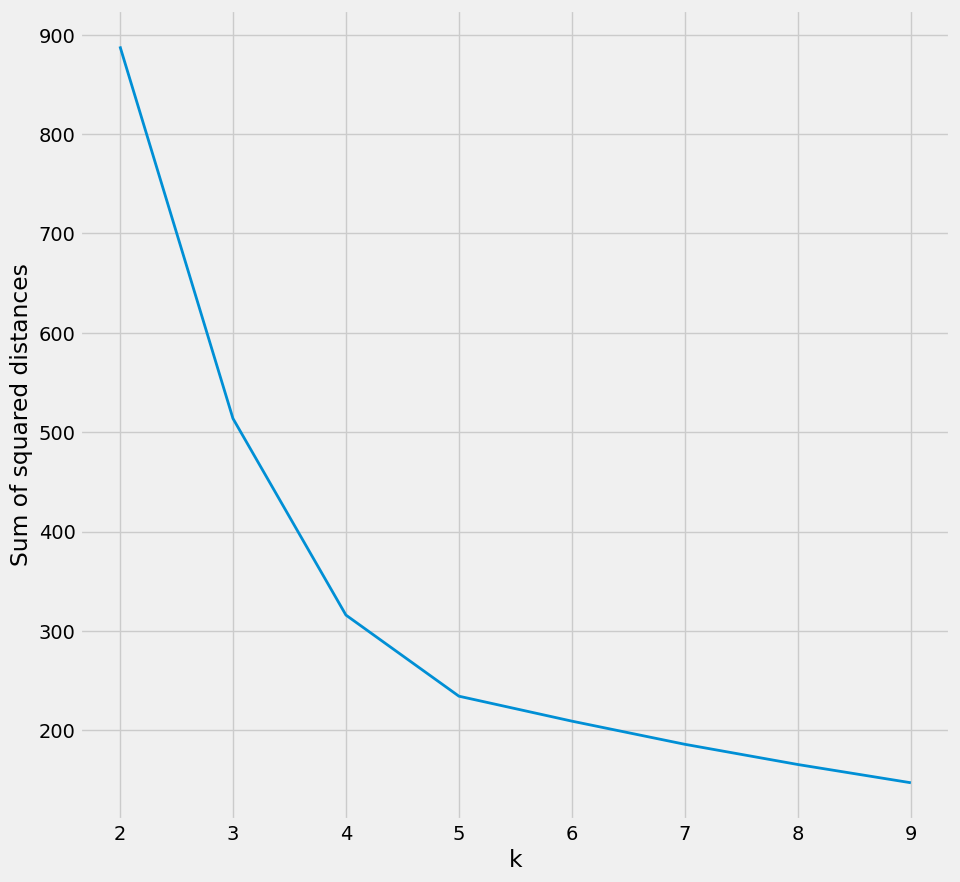

In [91]:
plt.figure(figsize=(10, 10))
plt.plot(k_values, inertias)
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.show()

In [92]:
kmeans = KMeans(n_clusters=5, n_init=20, random_state=0)

In [93]:
subset = df_cluster[cluster_columns]

In [94]:
kmeans = KMeans(n_clusters=5, n_init=20, random_state=0)
subset = df_cluster[cluster_columns]

In [95]:
df_cluster["cluster"] = kmeans.fit_predict(subset)

In [96]:
df_cluster

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,category,participant,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,heavy,B,64,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,heavy,B,64,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,heavy,B,64,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,bench,heavy,B,64,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,bench,heavy,B,64,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,medium,E,71,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,medium,E,71,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,medium,E,71,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


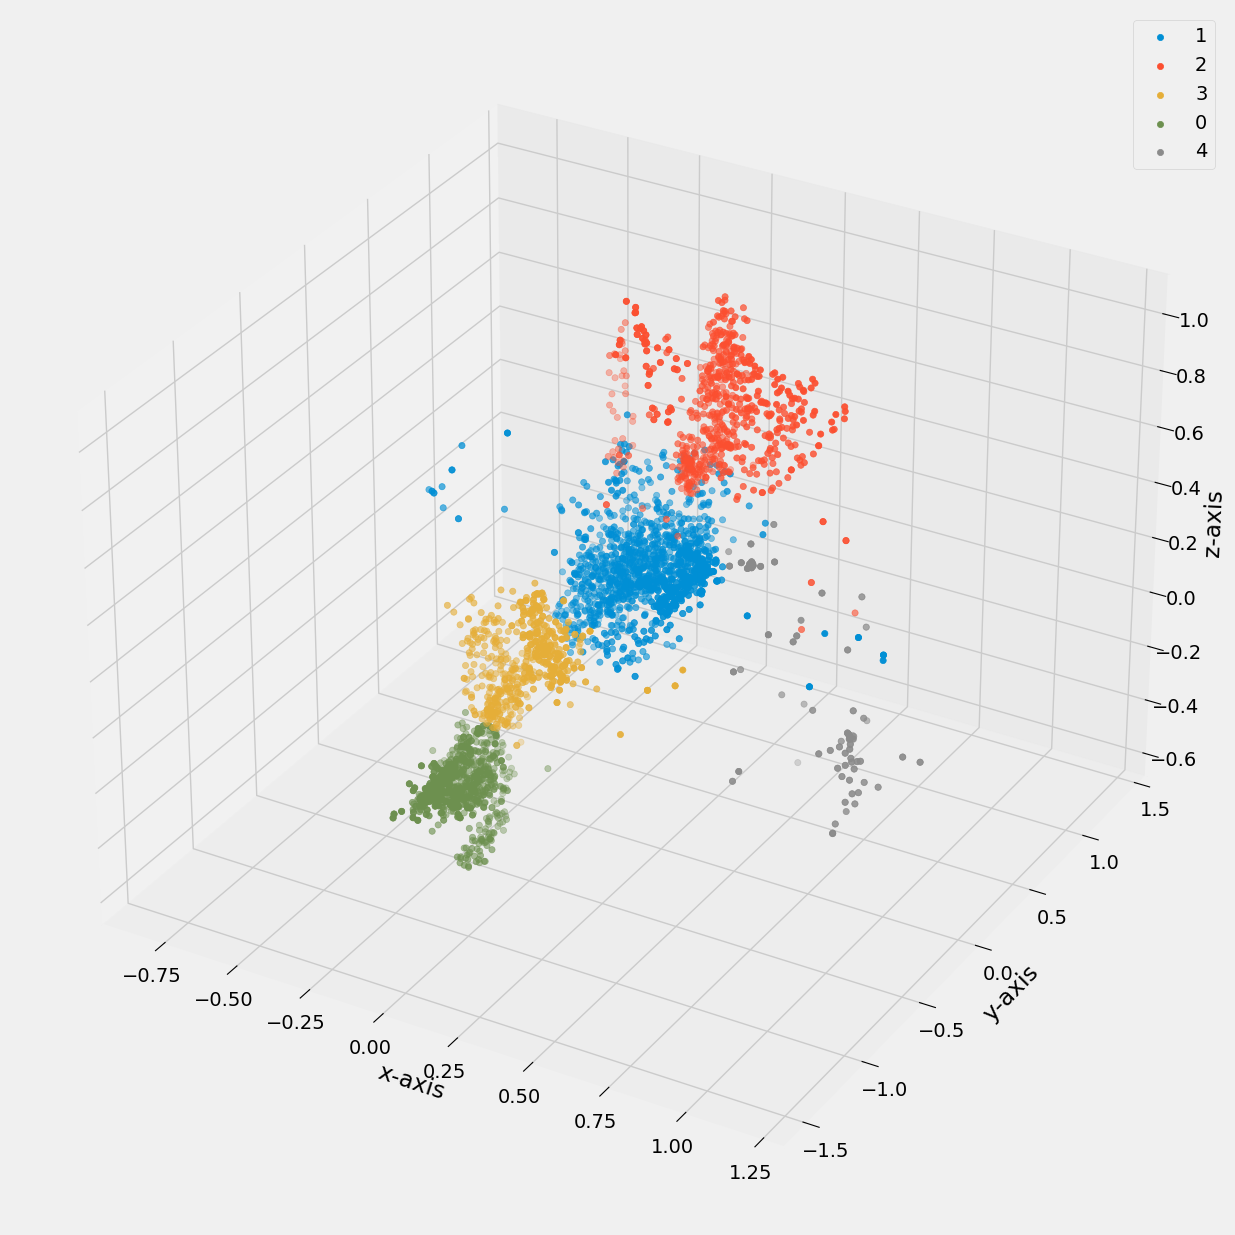

In [97]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection = "3d")
for c in df_cluster["cluster"].unique():
    subset = df_cluster[df_cluster["cluster"] == c]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=c)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
plt.legend()
plt.show()

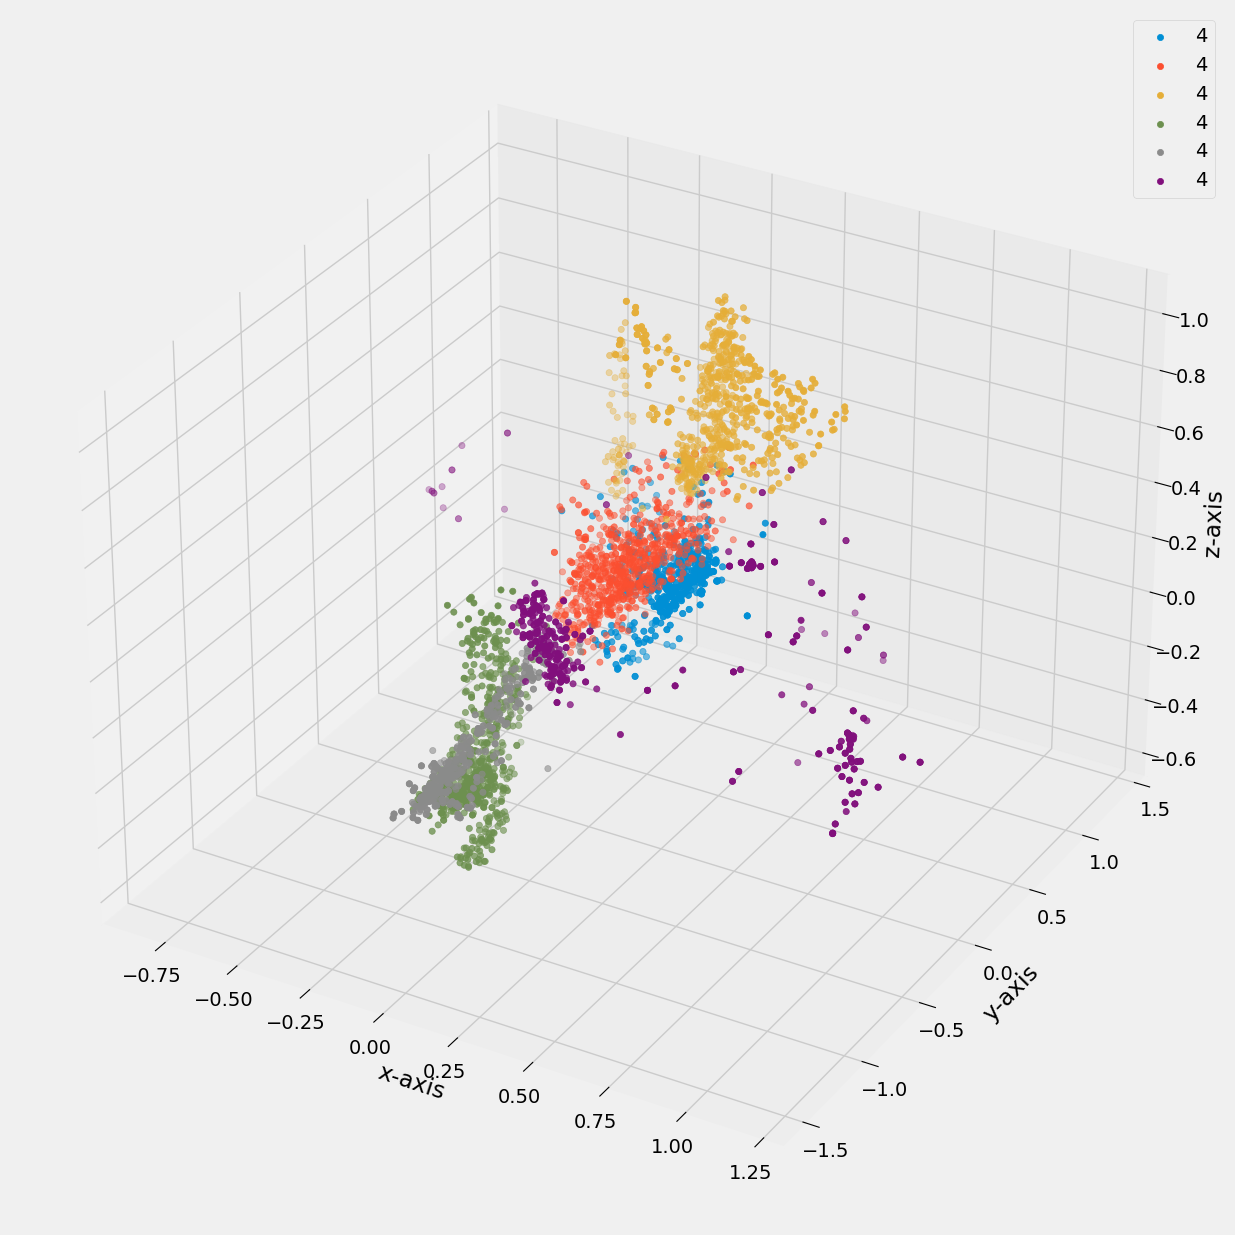

In [98]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection = "3d")
for l in df_cluster["label"].unique():
    subset = df_cluster[df_cluster["label"] == l]
    ax.scatter(subset["acc_x"], subset["acc_y"], subset["acc_z"], label=c)

ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")
plt.legend()
plt.show()

In [99]:
df_cluster.to_pickle("../../data/interim/data_features_03.pkl")